### BGT and SUD Trends

Dictionary:

    - SUD sector: 4-digit naics code for SUD industries filtered (see Supplemental material)
    
    - Health sector: 2-digit naics code for Health related industries (62)
    
    - NonSUD: difference between all Health related job openings and SUD related jobs
    
    - Employment: BLS data on USA employment
    
    - Outpatient: SUDT outpatient centers
    
    - Hospitals: SUDT hospitals
    
    - Residential: SUDT residential facilities

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [7]:
# Load CSV Files
fig1 = pd.read_csv('figure-1.csv', encoding='latin1', sep=",")

In [6]:
# for adjusting axis
import matplotlib.ticker as tick

def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int((tick_val)/1000000)
        return '{:d} M'.format(val)
    elif tick_val >= 1000:
        val = int((tick_val) / 1000)
        return '{:d} k'.format(val)
    elif tick_val < 1000:
        val = int(tick_val)
        return '{:d}'.format(val)
    else:
        return int(tick_val)

### Plos One Figure 1

### Figure 1a

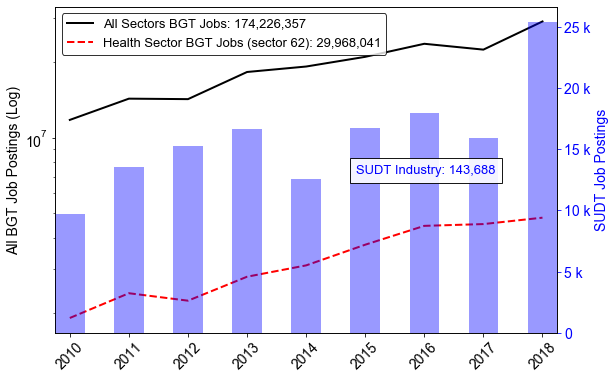

In [34]:
plt.rcParams['axes.xmargin'] = 0 # remove  margins
plt.rcParams['svg.fonttype'] = 'none' # for svg formatting
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rcParams['font.sans-serif'] = "Arial"

plt.rcParams['font.family'] = "sans-serif"

np.seterr(divide='ignore', invalid='ignore') # to remove warning messages


fig = plt.figure(figsize=(9, 6),facecolor='white') # figure size and white background
plt.yscale('log')
x1 = fig1.Year.values
ax1 = plt.gca()


ax1.plot(x1, fig1.All.values, linewidth=2.0, color='black', linestyle='-') # 
ax1.plot(x1, fig1.Health.values, linewidth=2.0, color='red',linestyle='--') # 


ax1.set_ylabel('All BGT Job Postings (Log)',fontsize=14, color='black')

plt.xticks(rotation=45)
#ax1.set_ylabel('Online', color='black')
ax1.tick_params('y', colors='black')

leg = ax1.legend(['All Sectors BGT Jobs: 174,226,357 ','Health Sector BGT Jobs (sector 62): 29,968,041'], 
           loc='upper left',fontsize=13, frameon=1)

frame = leg.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

ax2 = ax1.twinx()


ax2.set_ylabel('SUDT Job Postings',fontsize=14,color='blue' )
ax2.tick_params('y', colors='blue')
ax2.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))


ax2.annotate('SUDT Industry: 143,688', xy=(2010, 13000), xytext=(2014.85,13000),fontsize=13, color='blue',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5',alpha=0.9))

ax2.bar(x1, fig1.SUD.values, width=0.5, color='blue',alpha=0.4)

#plt.savefig('Fig1A.tiff')
plt.savefig('Fig1ABGT-Job-Trends.svg')
#plt.savefig('Fig1A.png')


plt.show()

## Figure 1b

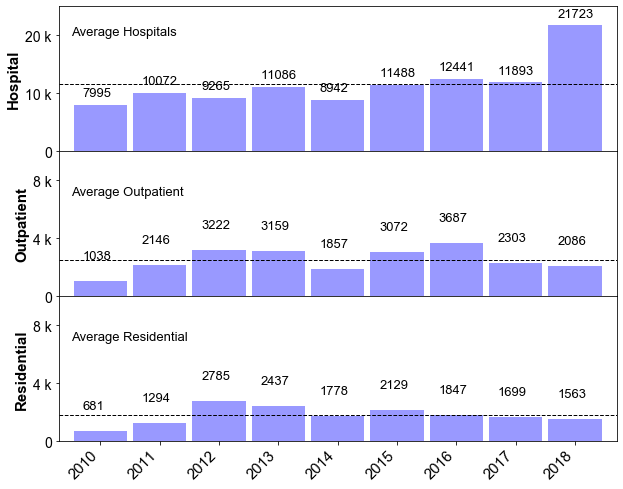

In [29]:
w, h = plt.figaspect(1.118)

 
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(10,8),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.gca()
#x1 = fig1.Year.values
x1=[2010,2011,2012,2013,2014,2015,2016,2017,2018]



y_pos = np.arange(len(x1))

ax1.set_xlim([-0.7, 8.7])
ax1.set_ylim([0, 25000])
ax2.set_ylim([0, 10000])
ax3.set_ylim([0, 10000])

ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

ax1.set_xticklabels([])



ax2.set_xticklabels([])
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

ax3.set_xticklabels(x1)
ax3.yaxis.set_major_locator(plt.MaxNLocator(3))
ax3.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.xticks(y_pos, x1, color='black', rotation=45,  fontsize='15', horizontalalignment='right')
#ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.bar(y_pos, fig1.Hospitals, linewidth=2.0, color='blue',alpha=0.4, width=0.9, edgecolor = "none") # 
ax1.set_ylabel('Hospital',fontweight='bold', fontsize='15')
ax2.bar(y_pos, fig1.Outpatient, linewidth=2.0, color='blue',alpha=0.4,width=0.9, edgecolor = "none") #
ax2.set_ylabel('Outpatient',fontweight='bold', fontsize='15')
ax3.bar(y_pos, fig1.Residential, linewidth=2.0, color='blue',alpha=0.4,width=0.9, edgecolor = "none") # 
ax3.set_ylabel('Residential',fontweight='bold', fontsize='15')


for i in range(len(x1)):
    ax1.text(x = i-0.3 , y = fig1.Hospitals[i]+1500, s = fig1.Hospitals[i], size = 13)
    ax2.text(x = i-0.3 , y = fig1.Outpatient[i]+1500, s = fig1.Outpatient[i], size = 13)
    ax3.text(x = i-0.3 , y = fig1.Residential[i]+1500, s = fig1.Residential[i], size = 13)


ax1.axhline(fig1.Hospitals.mean(), color='black', linewidth=1, linestyle='--')
ax2.axhline(fig1.Outpatient.mean(), color='black', linewidth=1,linestyle='--')
ax3.axhline(fig1.Residential.mean(), color='black', linewidth=1,linestyle='--')

ax1.annotate('Average Hospitals', xy=(1, 20000), xytext=(-.5,20000),fontsize=13, color='black')
ax2.annotate('Average Outpatient', xy=(1, 7000), xytext=(-.5,7000),fontsize=13, color='black')
ax3.annotate('Average Residential', xy=(1, 7000), xytext=(-.5,7000),fontsize=13, color='black')

plt.xticks(rotation=45)
#plt.savefig('Fig1b.png')
plt.savefig('Fig1b.svg')
#plt.savefig('Fig1b.tiff')
plt.show()